In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class Perceptron:
    def __init__(self, input_size, learning_rate=0.05):
        self.weights = np.array([10] + [0.2] * (input_size - 1))  # Initialize weights
        self.weights = np.append(self.weights, -0.75)  # Append the last weight
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict(self, X):
        z = np.dot(X, self.weights[:-1]) + self.weights[-1]  # Include bias term
        return self.sigmoid(z)

    def fit(self, X, y, epochs=100):
        for epoch in range(epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights[:-1] += self.learning_rate * error * X[i]  # Update weights
                self.weights[-1] += self.learning_rate * error  # Update bias

if __name__ == "__main__":
    file_path = r"C:\Users\91912\Desktop\5TH SEMESTER\ML\GST - C_AST.xlsx"
    df = pd.read_excel(file_path)

    X = df.drop(columns=['Final_Marks']).values
    y = df['Final_Marks'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    perceptron = Perceptron(input_size=X.shape[1])
    perceptron.fit(X_train, y_train, epochs=100)

    y_pred = [round(perceptron.predict(x)) for x in X_test]

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

Accuracy: 0.0211864406779661


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

class Perceptron:
    def __init__(self, input_size, learning_rate=0.05):
        self.weights = np.array([10] + [0.2] * (input_size - 1))  # Initialize weights
        self.weights = np.append(self.weights, -0.75)  # Append the last weight
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict(self, X):
        z = np.dot(X, self.weights[:-1]) + self.weights[-1]  # Include bias term
        return self.sigmoid(z)

    def fit(self, X, y, epochs=100):
        for epoch in range(epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights[:-1] += self.learning_rate * error * X[i]  # Update weights
                self.weights[-1] += self.learning_rate * error  # Update bias

def load_excel_file(file_path):
    try:
        # Try to load using pandas read_excel
        df = pd.read_excel(file_path)
        return df
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        return None

if __name__ == "__main__":
    # The correct file path for a local machine
    file_path = r"C:\Users\91912\Desktop\5TH SEMESTER\ML\GST - C_AST.xlsx"

    # Load the Excel file
    df = load_excel_file(file_path)

    if df is not None:
        # Ensure the data is loaded and columns are correct
        if 'Final_Marks' in df.columns:
            # Prepare the input and output
            X = df.drop(columns=['Final_Marks']).values
            y = df['Final_Marks'].values

            # Split the dataset into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Initialize the perceptron model
            perceptron = Perceptron(input_size=X.shape[1])

            # Train the model
            perceptron.fit(X_train, y_train, epochs=100)

            # Make predictions (round to 0 or 1 for classification)
            y_pred = [round(perceptron.predict(x)) for x in X_test]

            # Calculate accuracy and other metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='macro', zero_division=1)  # Use 'macro' for multiclass
            recall = recall_score(y_test, y_pred, average='macro', zero_division=1)  # Use 'macro' for multiclass
            f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)  # Use 'macro' for multiclass
            conf_matrix = confusion_matrix(y_test, y_pred)

            # Output the results
            print("Accuracy:", accuracy)
            print("Precision (macro average):", precision)
            print("Recall (macro average):", recall)
            print("F1 Score (macro average):", f1)
            print("Confusion Matrix:\n", conf_matrix)
        else:
            print("Error: 'Final_Marks' column not found in the Excel file.")
    else:
        print("Failed to load the Excel file.")


Accuracy: 0.0211864406779661
Precision (macro average): 0.9110169491525423
Recall (macro average): 0.09090909090909091
F1 Score (macro average): 0.003772161448509996
Confusion Matrix:
 [[ 0  2  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0  0]]


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def load_excel_file(file_path):
    try:
        df = pd.read_excel(file_path)
        return df
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        return None

if __name__ == "__main__":
    # The correct file path for a local machine
    file_path = r"C:\Users\91912\Desktop\5TH SEMESTER\ML\GST - C_AST.xlsx"

    # Load the Excel file
    df = load_excel_file(file_path)

    if df is not None:
        # Ensure the data is loaded and columns are correct
        if 'Final_Marks' in df.columns:
            # Prepare the input and output
            X = df.drop(columns=['Final_Marks']).values
            y = df['Final_Marks'].values

            # Split the dataset into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Scale the data (MLPs usually perform better with scaled data)
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            # Initialize the MLP model
            mlp = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, learning_rate_init=0.01, random_state=42)

            # Train the model
            mlp.fit(X_train, y_train)

            # Make predictions
            y_pred = mlp.predict(X_test)

            # Calculate accuracy and other metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='macro', zero_division=1)  # Use 'macro' for multiclass
            recall = recall_score(y_test, y_pred, average='macro', zero_division=1)  # Use 'macro' for multiclass
            f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)  # Use 'macro' for multiclass
            conf_matrix = confusion_matrix(y_test, y_pred)

            # Output the results
            print("Accuracy:", accuracy)
            print("Precision (macro average):", precision)
            print("Recall (macro average):", recall)
            print("F1 Score (macro average):", f1)
            print("Confusion Matrix:\n", conf_matrix)
        else:
            print("Error: 'Final_Marks' column not found in the Excel file.")
    else:
        print("Failed to load the Excel file.")


Accuracy: 0.3050847457627119
Precision (macro average): 0.32652222152222155
Recall (macro average): 0.24123117929390342
F1 Score (macro average): 0.23297316716575098
Confusion Matrix:
 [[ 0  1  0  0  0  0  0  0  0  1  0]
 [ 0  0  1  0  1  0  2  0  0  0  1]
 [ 0  0  3  2  1  2  1  0  1  0  0]
 [ 0  0  2 10  6  6  4  1  0  0  0]
 [ 0  0  0  4  9  8  9  2  0  2  1]
 [ 0  0  1  3  4 19  9  2  1  1  1]
 [ 0  0  0  2  1  8 10  8  3  2  4]
 [ 0  0  1  2  2  4 14 15  4  0  3]
 [ 0  0  0  1  0  3  2  6  1  2  0]
 [ 0  0  0  1  0  0  0  3  0  2  2]
 [ 0  0  0  0  2  0  3  0  0  0  3]]


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def load_excel_file(file_path):
    try:
        df = pd.read_excel(file_path)
        return df
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        return None

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, conf_matrix

# File path to your Excel file
file_path = r"C:\Users\91912\Desktop\5TH SEMESTER\ML\GST - C_AST.xlsx"

# Load Excel data
df = load_excel_file(file_path)

if df is not None and 'Final_Marks' in df.columns:
    X = df.drop(columns=['Final_Marks']).values
    y = df['Final_Marks'].values

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


In [6]:
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC()

# Fit the model
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate
accuracy, precision, recall, f1, conf_matrix = evaluate_model(y_test, y_pred_svm)

# Display Results
print("SVM Results:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


SVM Results:
Accuracy: 0.3177966101694915
Precision: 0.5905377409548282
Recall: 0.23054236056537858
F1 Score: 0.21344752241070014
Confusion Matrix:
[[ 0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  2  0  2  1  0  0  0]
 [ 0  0  0  0  6  0  3  1  0  0  0]
 [ 0  0  0  5 16  0  6  2  0  0  0]
 [ 0  0  0  4 15  5 10  1  0  0  0]
 [ 0  0  0  2  9 16 12  1  1  0  0]
 [ 0  0  0  1  6  0 15 13  0  0  3]
 [ 0  0  0  2  3  0 21 18  0  0  1]
 [ 0  0  0  0  0  0 11  4  0  0  0]
 [ 0  0  0  1  1  0  4  1  0  0  1]
 [ 0  0  0  0  1  0  1  0  0  0  6]]


In [7]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier()

# Fit the model
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
accuracy, precision, recall, f1, conf_matrix = evaluate_model(y_test, y_pred_dt)

# Display Results
print("Decision Tree Results:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Decision Tree Results:
Accuracy: 0.3389830508474576
Precision: 0.3691801069430803
Recall: 0.30649489098539606
F1 Score: 0.28679032160287254
Confusion Matrix:
[[ 0  0  0  0  0  0  0  2  0  0  0]
 [ 0  1  1  0  1  1  1  0  0  0  0]
 [ 0  0  4  2  1  2  0  0  1  0  0]
 [ 0  1  3  7  6  4  3  2  2  1  0]
 [ 0  1  1  5 11  6  6  1  1  2  1]
 [ 0  1  2  4  4 18  8  2  2  0  0]
 [ 0  2  1  1  2  6 14  4  4  2  2]
 [ 0  1  0  4  5  5  8 15  2  2  3]
 [ 0  0  0  0  1  2  4  3  3  2  0]
 [ 0  0  0  1  0  1  0  2  0  2  2]
 [ 0  0  0  0  2  1  0  0  0  0  5]]


In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier()

# Fit the model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
accuracy, precision, recall, f1, conf_matrix = evaluate_model(y_test, y_pred_rf)

# Display Results
print("Random Forest Results:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Random Forest Results:
Accuracy: 0.3347457627118644
Precision: 0.4675063317696546
Recall: 0.2614867331823199
F1 Score: 0.2671193170499497
Confusion Matrix:
[[ 0  0  0  0  0  1  1  0  0  0  0]
 [ 0  0  1  0  2  0  2  0  0  0  0]
 [ 0  0  3  2  2  0  3  0  0  0  0]
 [ 0  0  1 10  7  6  3  1  1  0  0]
 [ 0  0  0  6 11  6  7  3  0  1  1]
 [ 0  0  0  2  5 18 10  4  2  0  0]
 [ 0  0  0  2  4  1 13 11  2  2  3]
 [ 0  0  0  1  3  4 14 17  4  1  1]
 [ 0  0  0  0  1  1  2  7  2  2  0]
 [ 0  0  0  0  1  1  1  2  0  2  1]
 [ 0  0  0  1  1  1  2  0  0  0  3]]


In [9]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the model
ada_model = AdaBoostClassifier()

# Fit the model
ada_model.fit(X_train, y_train)

# Predict
y_pred_ada = ada_model.predict(X_test)

# Evaluate
accuracy, precision, recall, f1, conf_matrix = evaluate_model(y_test, y_pred_ada)

# Display Results
print("AdaBoost Results:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


C:\Users\91912\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Results:
Accuracy: 0.19915254237288135
Precision: 0.679073756432247
Recall: 0.11165496890785721
F1 Score: 0.06798763141620284
Confusion Matrix:
[[ 0  0  0  0  0  0  1  1  0  0  0]
 [ 0  0  0  0  0  0  4  1  0  0  0]
 [ 0  0  0  0  2  0  8  0  0  0  0]
 [ 0  0  1  0  2  0 25  1  0  0  0]
 [ 0  0  0  0  3  0 31  1  0  0  0]
 [ 0  0  0  0  0  8 33  0  0  0  0]
 [ 0  0  0  0  1  0 36  1  0  0  0]
 [ 0  0  0  0  2  0 43  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0]]


In [10]:
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
accuracy, precision, recall, f1, conf_matrix = evaluate_model(y_test, y_pred_xgb)

# Display Results
print("XGBoost Results:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


C:\Users\91912\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
Accuracy: 0.2966101694915254
Precision: 0.3224072267876043
Recall: 0.23160874668001402
F1 Score: 0.22367644153083724
Confusion Matrix:
[[ 0  1  0  0  0  0  0  1  0  0  0]
 [ 0  0  2  1  1  0  1  0  0  0  0]
 [ 0  0  2  1  3  1  2  1  0  0  0]
 [ 0  0  4  6  8  6  4  0  1  0  0]
 [ 0  0  0  4 12  6  8  3  0  1  1]
 [ 0  0  0  1  6 18 12  1  3  0  0]
 [ 0  0  1  2  2  5 11  8  4  1  4]
 [ 0  0  0  3  2  6 13 14  5  1  1]
 [ 0  0  0  0  0  2  5  4  2  0  2]
 [ 0  0  0  0  0  2  1  1  1  1  2]
 [ 0  0  0  0  2  1  1  0  0  0  4]]


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd

# Assuming X and y are defined as your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Calculate training and test accuracy
train_acc_nb = nb_model.score(X_train, y_train)
test_acc_nb = nb_model.score(X_test, y_test)

# Display results
print("Naïve Bayes Results:")
print(f"Training Accuracy: {train_acc_nb:.4f}")
print(f"Test Accuracy: {test_acc_nb:.4f}")

Naïve Bayes Results:
Training Accuracy: 0.2915
Test Accuracy: 0.2669


In [12]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Assuming X and y are defined as your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Calculate training and test accuracy
train_acc_xgb = xgb_model.score(X_train, y_train)
test_acc_xgb = xgb_model.score(X_test, y_test)

# Display results
print("XGBoost Results:")
print(f"Training Accuracy: {train_acc_xgb:.4f}")
print(f"Test Accuracy: {test_acc_xgb:.4f}")

C:\Users\91912\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:44:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
Training Accuracy: 0.8436
Test Accuracy: 0.2966


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

# Assuming X and y are defined as your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

# Calculate training and test accuracy
train_acc_ada = ada_model.score(X_train, y_train)
test_acc_ada = ada_model.score(X_test, y_test)

# Display results
print("AdaBoost Results:")
print(f"Training Accuracy: {train_acc_ada:.4f}")
print(f"Test Accuracy: {test_acc_ada:.4f}")

C:\Users\91912\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Results:
Training Accuracy: 0.2394
Test Accuracy: 0.1992


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are defined as your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Calculate training and test accuracy
train_acc_rf = rf_model.score(X_train, y_train)
test_acc_rf = rf_model.score(X_test, y_test)

# Display results
print("Random Forest Results:")
print(f"Training Accuracy: {train_acc_rf:.4f}")
print(f"Test Accuracy: {test_acc_rf:.4f}")

Random Forest Results:
Training Accuracy: 0.8436
Test Accuracy: 0.3220


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assuming X and y are defined as your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Calculate training and test accuracy
train_acc_dt = dt_model.score(X_train, y_train)
test_acc_dt = dt_model.score(X_test, y_test)

# Display results
print("Decision Tree Results:")
print(f"Training Accuracy: {train_acc_dt:.4f}")
print(f"Test Accuracy: {test_acc_dt:.4f}")

Decision Tree Results:
Training Accuracy: 0.8436
Test Accuracy: 0.3178


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Assuming X and y are defined as your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Calculate training and test accuracy
train_acc_svm = svm_model.score(X_train, y_train)
test_acc_svm = svm_model.score(X_test, y_test)

# Display results
print("SVM Results:")
print(f"Training Accuracy: {train_acc_svm:.4f}")
print(f"Test Accuracy: {test_acc_svm:.4f}")

SVM Results:
Training Accuracy: 0.3223
Test Accuracy: 0.2246


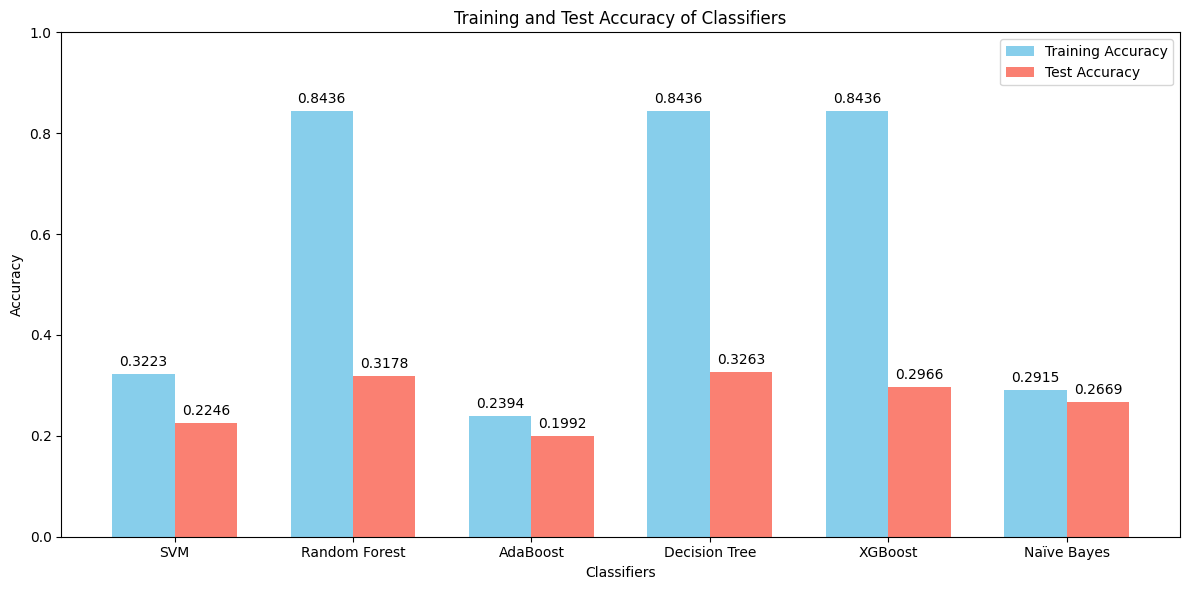

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier names
classifiers = ["SVM", "Random Forest", "AdaBoost", "Decision Tree", "XGBoost", "Naïve Bayes"]

# Training and Test Accuracy values
train_accuracies = [0.3223, 0.8436, 0.2394, 0.8436, 0.8436, 0.2915]
test_accuracies = [0.2246, 0.3178, 0.1992, 0.3263, 0.2966, 0.2669]

# Set up the bar width and positions
bar_width = 0.35
x = np.arange(len(classifiers))

# Create the plot
plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - bar_width/2, train_accuracies, bar_width, label='Training Accuracy', color='skyblue')
bars2 = plt.bar(x + bar_width/2, test_accuracies, bar_width, label='Test Accuracy', color='salmon')

# Adding titles and labels
plt.title('Training and Test Accuracy of Classifiers')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.xticks(x, classifiers)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.legend()

# Adding data labels on top of the bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

In [19]:
pip install lime


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.9 MB 2.3 MB/s eta 0:00:06
   ----- ---------------------------------- 1.8/12.9 MB 2.8 MB/s eta 0:00:04
   --------- ------------------------------ 3.1/12.9 MB 3.7 MB/s eta 0:00:03
   ----------------- ---------------------- 5.8/12.9 MB 5.5 MB/s eta 0:00:02
   ------------------------- -------------- 8.1/12.9 MB 6.5 MB/s eta 0:00:01
   -------------------------------- ------- 10.5/12.9 MB 7.1 MB/s eta 0:00:01
   -------------------------------------- - 12.6/12.9 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 7.3 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283842 sha256=6d8947d0c537c0744d83456dcbe49a8a420d9a5faee3263df430a5

First few rows of the dataset:
    ast_embedding_0  ast_embedding_1  ast_embedding_2  ast_embedding_3  \
0        -0.652077        -0.381031         0.241843        -0.513551   
1        -0.613638        -0.298634         0.176589        -0.375355   
2        -0.316263        -0.586708         0.693679        -0.219225   
3        -0.490600        -0.709072         0.926167        -0.734061   
4        -0.652077        -0.381031         0.241843        -0.513551   

   ast_embedding_4  ast_embedding_5  ast_embedding_6  ast_embedding_7  \
0         0.215833         1.694882         0.293240         1.544401   
1         0.202138         1.628187         0.392235         1.544328   
2         0.633661         1.830899        -0.039184         2.166054   
3         0.851367         1.574743        -0.341501         2.575879   
4         0.215833         1.694882         0.293240         1.544401   

   ast_embedding_8  ast_embedding_9  ...  ast_embedding_759  \
0        -2.268493        -

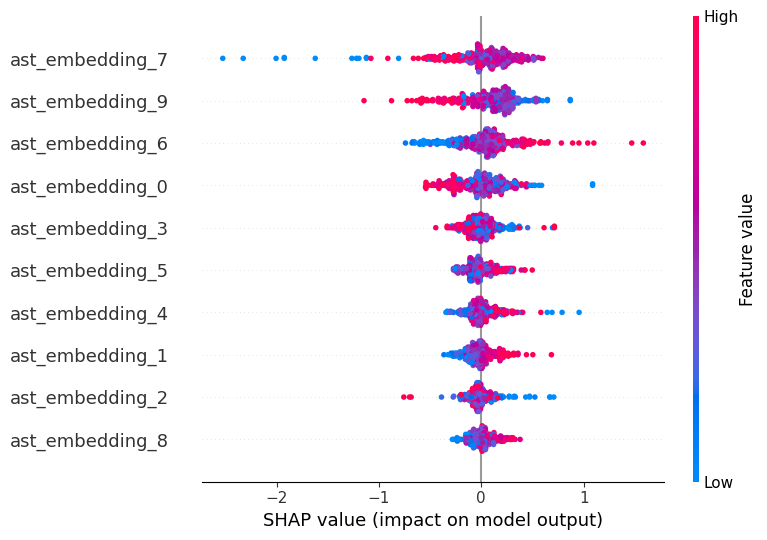

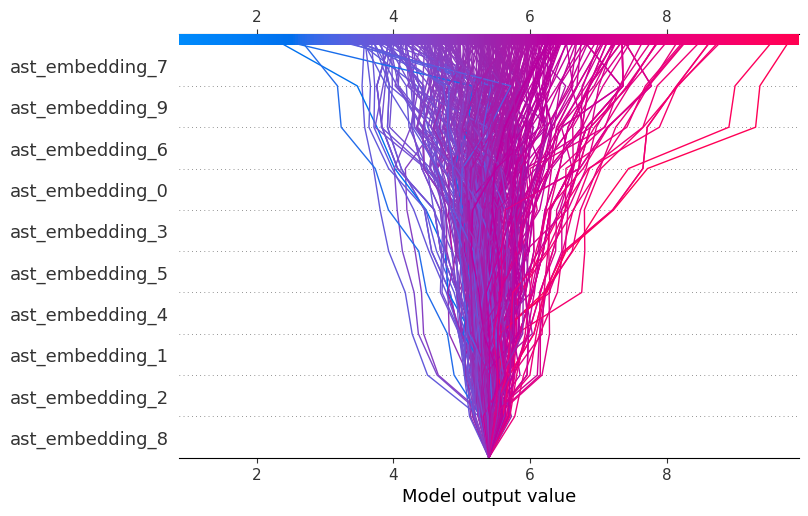

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import shap
import matplotlib.pyplot as plt

# File path to your Excel dataset
file_path = r"C:\Users\91912\Desktop\5TH SEMESTER\ML\GST - C_AST.xlsx"

# Load your dataset
df = pd.read_excel(file_path)

# Basic data exploration
print("First few rows of the dataset:\n", df.head())
print("Columns in the dataset:", df.columns)

# Preprocessing: Drop rows or columns with missing values
df = df.dropna()

# Specify target column (modify 'Final_Marks' to your actual target column)
target_column = 'Final_Marks'

# Check if the target column exists
if target_column not in df.columns:
    raise ValueError(f"The specified target column '{target_column}' does not exist in the dataset.")

# Prepare features and target variable
X = df.drop(columns=[target_column])
y = df[target_column]

# Select up to 10 sample columns if your dataset has more than 10 columns
num_features = min(10, X.shape[1])
X = X.iloc[:, :num_features]

# Print selected features for debugging
print("Selected features:", X.columns)

# If there are any categorical features, encode them
X_encoded = pd.get_dummies(X, drop_first=True)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=1)

# Train a Random Forest Regressor model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Generate and print regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

### SHAP Explanation ###
explainer = shap.Explainer(regressor, X_train)  # Use SHAP Explainer for Random Forest
shap_values = explainer(X_test)

# Create an Explanation object for visualization (optional but recommended)
explanation = shap.Explanation(values=shap_values.values, base_values=explainer.expected_value, data=X_test)

# SHAP Summary plot (global feature importance)
shap.summary_plot(explanation)

# Force plot for the first prediction
shap.plots.force(explanation[0])  # Accessing the first explanation

# Force plot for the seventh prediction (ensure there are at least 7 samples)
if len(X_test) > 6:
    shap.plots.force(explanation[6])  # Accessing the seventh explanation

# Decision plot for all features
shap.decision_plot(explainer.expected_value, shap_values.values, X_test.columns)

# Display plots
plt.show()